<a href="https://colab.research.google.com/github/manisha-dhanuka/Recommendation-System/blob/main/Netflix_movies_and_tv_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name -Netflix movies and tv shows clustering

# Project Type - Unsupervised
# Contribution - Individual

# Project Summary:
About Netflix: Netflix is the world's leading streaming entertainment service with over 209 million paid memberships in over 190 countries enjoying TV series, documentaries and  feature films. In thsi project, we have a data related to the movies/shows that are streamed on Netflix. But we didn't have any information about users or their choices. So, we analysed the features and used the available data to cluster similar items rather than making personalised recommendations.

1. Started with Data cleaning steps: Removed discrepancy in date added v/s released date.Also, handled the null values by imputing it with 'Unavailable.'
2. Explored the data set, knowing different ratings content density.
3. Analysed if Netflix has changed its focus to TV Shows...It comes out that Netflix is concentrating on TV Shows, but it has not lost it's focus from Movies as well.
4. We also created a function called 'welcome' which will give the information about the type of genres, different types of rating-content that are available in the country user want to know.
5. Further used NearestNeighbors model on text based features with cosine similarity as metric to recommend the data based on the content of the given show/film.
6. 2nd model used was KNN to find the different clusters.

# Github Link:
https://github.com/manisha-dhanuka/Recommendation-System

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing the drive

In [1]:
# Importing the drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries:

In [2]:
# importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading:


In [3]:
# loading the data in colab:
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
#some basic info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
# shape of the data:
df.shape

(7787, 12)

# First Look

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#Observation:

Thus, the data consists of 7787 entries and 12 columns, there are null values too in the data we need to get rid of that too.

In [7]:
# Converting date_added to datetime type:
df['date_added'] = pd.to_datetime(df['date_added'])

## Data Cleaning & Feature Enginnering:

In [8]:
# Null values: 
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# dropping those entries whose date added is not given:
df = df[df['date_added'].notna()].reset_index().drop('index',axis = 1)

In [10]:
# creating a new column for added_year:
df['added_year'] = df['date_added'].apply( lambda x: int(x.year))

In [11]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7773,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7774,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7775,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast             718
country          506
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
added_year         0
dtype: int64

In [13]:
df = df.fillna('Unavailable')

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
added_year      0
dtype: int64

# Data indiscrepancy:

There are 12 entries for which added date is before than release year which is absurd. Thus, dropping those entries.

In [15]:
df[df['added_year']<df['release_year']].shape

(12, 13)

In [16]:
# checking if there is any error in data  in case of added dates
df[df['added_year']<df['release_year']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
581,s584,TV Show,Arrested Development,Unavailable,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,2018-05-29,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,2018
1023,s1026,TV Show,BoJack Horseman,Unavailable,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2019-10-25,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,2019
2307,s2312,TV Show,Fuller House,Unavailable,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,2019-12-06,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,2019
2597,s2603,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2017-07-01,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,2017
2736,s2742,TV Show,Hilda,Unavailable,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
2976,s2982,Movie,Incoming,Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...","Serbia, United States",2018-10-26,2019,TV-MA,89 min,"Action & Adventure, Sci-Fi & Fantasy",When an imprisoned terrorist cell hijacks a hi...,2018
3093,s3099,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2013-03-31,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ken Bruen's bestselling crime novels leap to l...,2013
3919,s3927,TV Show,Maradona in Mexico,Unavailable,Diego Armando Maradona,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",2019
5484,s5494,TV Show,Sense8,Unavailable,"Tuppence Middleton, Brian J. Smith, Doona Bae,...",United States,2016-12-23,2018,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","From the creators of ""The Matrix"" and ""Babylon...",2016
6452,s6463,TV Show,The Hook Up Plan,Unavailable,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2019-10-11,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",2019


In [17]:
df = df[df['added_year']>=df['release_year']].reset_index().drop('index',axis = 1)

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


## Checking for duplicate values:

In [19]:
# checking if show id is repeated or not
df['show_id'].count(), df['show_id'].nunique()

(7765, 7765)

In [20]:
# checking for duplicates
df.duplicated().sum()

0

# Data Preprocessing:

## Importing the re i.e. Regular Expression Library to preprocess the text based features

In [21]:
import re

In [22]:
def text_process(x):
  '''
  This function will remove the extra spaces and convert the multiple entries of a feature into list of data.
  '''
  return re.split(',\s*',x)

In [23]:
df_new = df.copy()

In [24]:
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [25]:
df_new['country'] = df_new['country'].apply(text_process)
df_new['listed_in'] = df_new['listed_in'].apply(text_process)
df_new['cast']= df_new['cast'].apply(text_process)
df_new['director']= df_new['director'].apply(text_process)

In [26]:
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,[Unavailable],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],2020-08-14,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],2018-12-20,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],2017-11-16,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],2020-01-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,2020


# Exploratory Data Analysis:

# TV and movie Ratings:
* TV-Y - programs aimed at a very young audience, including children from ages 2-6.
* TV-Y7 - programs most appropriate for children age 7 and up.
* TV-Y7-FV - programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.
* TV-G - programs suitable for all ages; these are not necessarily children's shows.
* TV-PG - parental guidance is recommended; these programs may be unsuitable for younger children.
* TV-14 - these shows may be unsuitable for children under 14.
* TV-MA - these programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.
* UR/NR -Film has not been submitted for a rating or is an uncut version of a film that was submitted
* G: All people can see it.
* PG: Parents must see it with a child or okay it.
* PG-13:Parents must okay if under 13.
* R: Parents must okay if under 18.
* NC-17: You MUST be over 17 to see it, no exceptions!





In [27]:
ratings_info = {'TV-Y':'Programs aimed at a very young audience, including children from ages 2-6.',
                'TV-Y7':'Programs most appropriate for children age 7 and up.',
                'TV-Y7-FV':'Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.',
                'TV-G':'Programs suitable for all ages; these are not necessarily children shows.',
                'TV-PG':'Parental guidance is recommended; these programs may be unsuitable for younger children.',
                'TV-14':'These shows may be unsuitable for children under 14.',
                'TV-MA':'These programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.',
                'UR':'Film has not been submitted for a rating or is an uncut version of a film that was submitted',
                'NR':'Film has not been submitted for a rating or is an uncut version of a film that was submitted',
                'G':'All people can see it.',
                'PG':'Parents must see it with a child or okay it.',
                'PG-13':'Parents must okay if under 13.',
                'R':'Parents must okay if under 18.',
                'NC-17':'You MUST be over 17 to see it, no exceptions!'
                }

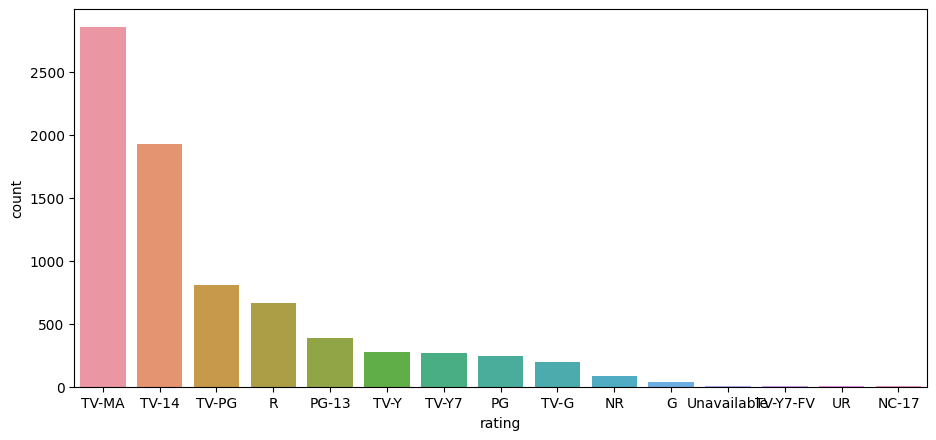

In [28]:
plt.figure(figsize = (11,5),dpi = 100)
sns.countplot(data = df_new,
              x= 'rating',
              order = df_new['rating'].value_counts().index);

# Why did you pick the specific chart?
Picked this countplot to analyse the type of content available on Netflix to know if it caters to the entertainment need of all beyond the age factor or this is specific to some age group.

# Insights from the chart:
It seems very less content is avaiable for the kids. Most of them are meant for adult audiene or required parent's presence.

# Impact on the business:
In today's tech world, people of age group 13-23 are the main chunk who see all these content, but still the amount of data for their consumption is very less. 
The company needs to look into it otherwise the customer churning rate will surely increase. 

In [30]:
sns.set()

#Problem Statement: Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [29]:
# Let's see the number of TV show and the movies:
df_new['type'].value_counts()

Movie      5375
TV Show    2390
Name: type, dtype: int64

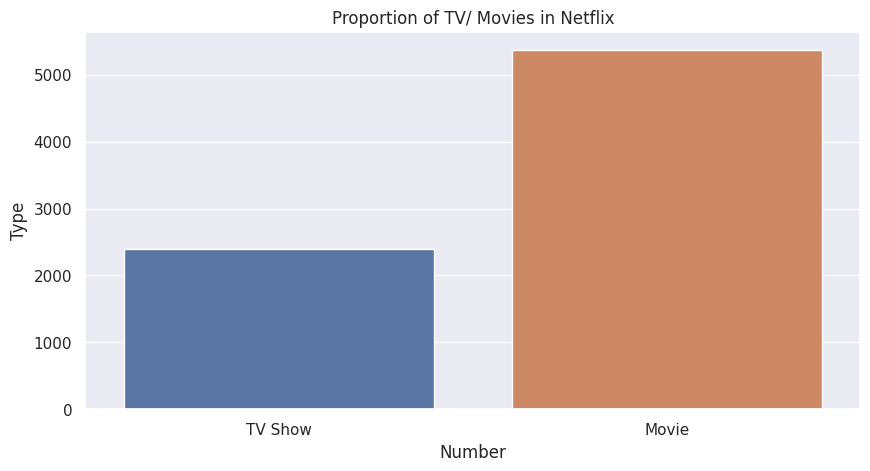

In [31]:
# plotting the tv-movie proportion
plt.figure(figsize = (10,5),dpi = 100)
sns.countplot(data = df_new, x = 'type')
plt.xlabel('Number')
plt.ylabel('Type')
plt.title('Proportion of TV/ Movies in Netflix');

# Why this chart?
To understand the tv show and movie distribution on data.
# Observation:
Nearly movies doubled the amount of tv shows on the platform.
# Impact:
If focus is also shifted to TV SHows or series, then it will be beneficial to the company ..Since more duration means more streming time & thus better revenue.

# Tv-movie proportion over the years:

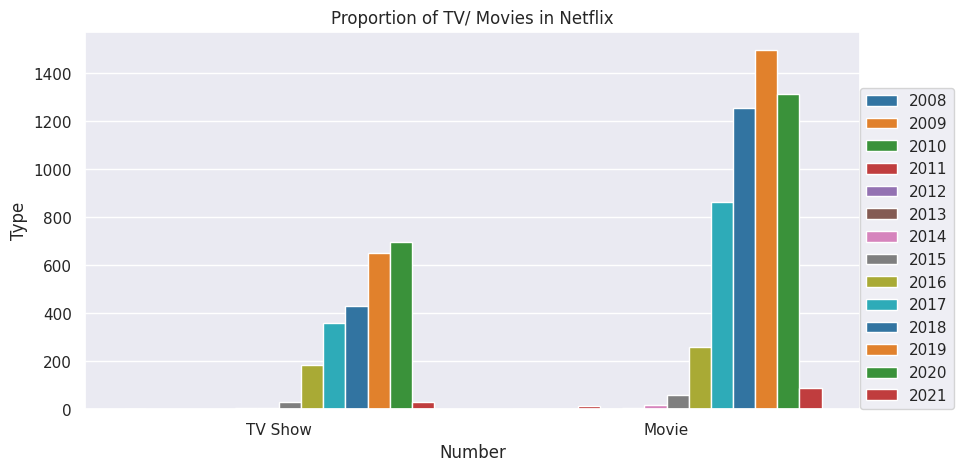

In [32]:
# plotting the tv-movie proportion over the years:
plt.figure(figsize = (10,5),dpi = 100)
sns.countplot(data = df_new, x = 'type',hue ='added_year',hue_order = np.arange(2008,2022),palette = 'tab10')
plt.xlabel('Number')
plt.ylabel('Type')
plt.title('Proportion of TV/ Movies in Netflix')
plt.legend(loc= (1,0));

## Why this chart?
So as to analyse per year growth of the amount of the content of these type of contents.
## Insights:
It seems that per year growth of movies is better than that of TV shows.
## Impact:
Need further analysis to see the true picture

# Comparison:
We are going to do feature engineering to find the per year growth in these contents in numbers & percentage and then conclude if it is true that netflix has started concentrating more on TV shows.

In [33]:
# Counts of each type over the years:
compare  = df_new.groupby(['added_year','type']).count()['show_id'].unstack()

In [34]:
compare

type,Movie,TV Show
added_year,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,4.0
2014,19.0,6.0
2015,58.0,30.0
2016,258.0,183.0


In [35]:
compare['Movie per year growth (in percentage)'] = round(compare.Movie.diff()*100 /compare.Movie.shift(1),2)
compare['TV Show per year growth (in percentage)'] = round(compare['TV Show'].diff()*100 /compare['TV Show'].shift(1),2)

In [36]:
compare

type,Movie,TV Show,Movie per year growth (in percentage),TV Show per year growth (in percentage)
added_year,,,,
2008,1.0,1.0,NaN,NaN
2009,2.0,NaN,100.00,NaN
2010,1.0,NaN,-50.00,NaN
2011,13.0,NaN,1200.00,NaN
2012,3.0,NaN,-76.92,NaN
2013,6.0,4.0,100.00,NaN
2014,19.0,6.0,216.67,50.00
2015,58.0,30.0,205.26,400.00
2016,258.0,183.0,344.83,510.00


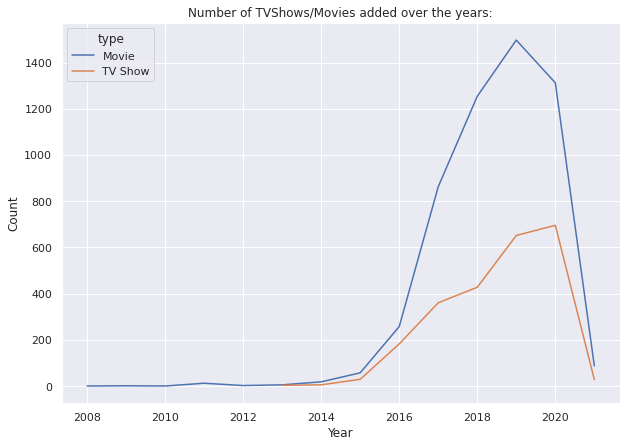

In [37]:
compare[['Movie','TV Show']].plot(figsize = (10,7))
plt.title('Number of TVShows/Movies added over the years:')
plt.xlabel('Year')
plt.ylabel('Count');

## Why this chart?
Comparing the two types of content.

## Insights:
Clearly it is visible that although the amount of TV shows increased but rate of growth of movies on platform is still better. But during late 2019 and early 2020,  the number of content added has reduced in both types, The reason could be the ongoing COVID pandemic at that time.

## Impact:
this insight can help in making a positive impact if steps taken to boost the content & coming up with more ideas for customer engagement on the platform.

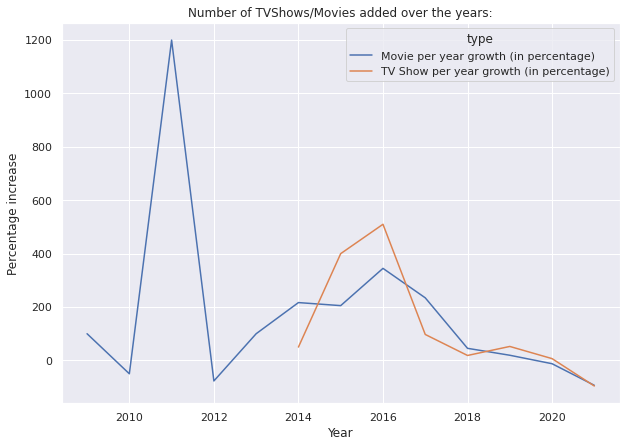

In [38]:
compare[['Movie per year growth (in percentage)','TV Show per year growth (in percentage)']].plot(figsize = (10,7))
plt.title('Number of TVShows/Movies added over the years:')
plt.xlabel('Year')
plt.ylabel('Percentage increase');

## Why this chart:
for tracking percentage growth of these type sof content per year.

## Insights
1. In 2010-2011, the number of movies added to Netflix was increasing at greater pace, but starts decreasing after that or increase at lower pace.

2. Year 2014-2016 were good for TV shows.

## Impact:
As such, neither positive nor negative impact.

# Problem Statement: Understanding what type content is available in different countries

# Analysis Steps overview:

1. First we will try to understand the type of content available in different countries--- created dataframe 'country_type'
2. Then we understand the genres of content available in different countries--- created dataframe 'country_and_genre' and created a function 'country_genre' to extract all the genres available in that country. 
3. Further created a function called 'welcome' which sum up all the items based on country and give user the list of content available on Netflix as per user specifications.


In [39]:
# Countries-genre-ratings DataFrame:
country_df= df_new.loc[:,['title','country','listed_in','rating','type']].copy()


In [40]:
country_df

,title,country,listed_in,rating,type
0,3%,[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",TV-MA,TV Show
1,7:19,[Mexico],"[Dramas, International Movies]",TV-MA,Movie
2,23:59,[Singapore],"[Horror Movies, International Movies]",R,Movie
3,9,[United States],"[Action & Adventure, Independent Movies, Sci-F...",PG-13,Movie
4,21,[United States],[Dramas],PG-13,Movie
...,...,...,...,...,...
7760,Zozo,"[Sweden, Czech Republic, United Kingdom, Denma...","[Dramas, International Movies]",TV-MA,Movie
7761,Zubaan,[India],"[Dramas, International Movies, Music & Musicals]",TV-14,Movie
7762,Zulu Man in Japan,[Unavailable],"[Documentaries, International Movies, Music & ...",TV-MA,Movie
7763,Zumbo's Just Desserts,[Australia],"[International TV Shows, Reality TV]",TV-PG,TV Show


In [41]:
country_df = country_df.explode(['country']).explode('listed_in').reset_index().drop('index',axis= 1)

In [42]:
country_df

,title,country,listed_in,rating,type
0,3%,Brazil,International TV Shows,TV-MA,TV Show
1,3%,Brazil,TV Dramas,TV-MA,TV Show
2,3%,Brazil,TV Sci-Fi & Fantasy,TV-MA,TV Show
3,7:19,Mexico,Dramas,TV-MA,Movie
4,7:19,Mexico,International Movies,TV-MA,Movie
...,...,...,...,...,...
20888,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United Kingdom,Music & Musicals,TV-MA,Movie
20889,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Canada,Documentaries,TV-MA,Movie
20890,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Canada,Music & Musicals,TV-MA,Movie
20891,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United States,Documentaries,TV-MA,Movie


# Step-1 :Understand the type of content available in different countries--- created dataframe 'country_type'

In [43]:
country_type = country_df.groupby(['country','type']).count()['title'].unstack().fillna(0)

In [44]:
country_type.loc['India']

type
Movie      2479.0
TV Show     181.0
Name: India, dtype: float64

# Step-2: Understand the genres of content available in different countries--- created dataframe 'country_and_genre' and created a function 'country_genre' to extract all the genres available in that country.

In [45]:
country_and_genre = country_df.groupby(['country','listed_in']).count()['title'].unstack().fillna(0).rename_axis( axis = 1).T

In [46]:
def country_genre(country = None,data = country_and_genre):

  '''

  This function provides the genre related to the contents available on the Netflix platform.

  Parameters Used:
  data --- the dataframe containing country as columns and genre as index
  country ---the country you want to search about

  '''
  if country==None or country =='':
    print('\nDifferent genres available on Netflix are:')
    genre = data.index.to_list()
  else:
    print('\nDifferent genres available in {} are:'.format(country))
    genre = data[data.loc[:,country]!=0.0].index.to_list()
  print(genre)
  print('\n\n')

In [47]:
country_genre('Afghanistan')


Different genres available in Afghanistan are:
['Documentaries', 'International Movies']





In [48]:
# TV Shows/Movies which are availbale to watch in the country:
def country_genre_rating(country = None, genre = None):
  '''

  This function provides the ratings of the contents available on the Netflix platform.

  Parameters Used:
  country ---the country you want to search about
  genre----the genre in which one is interested.

  '''
  if country==None or country =='':
    if genre == None or genre == '':
      print('\nTv Shows/Movies belonging to these ratings are available on Netflix :')
      Ratings = country_df['rating'].unique()
    else:
      print('\nTv Shows/Movies belonging to these ratings and given genre are available on Netflix :')
      Ratings = country_df.loc[country_df['listed_in']==genre]['rating'].unique()
  else:
    if genre == None or genre == '':
      print('\nTv Shows/Movies belonging to these ratings are available on Netflix for {}'.format(country))
      Ratings = country_df.loc[country_df['country']==country]['rating'].unique()
    else:
      print('\nTv Shows/Movies belonging to these ratings and given genre are available on Netflix for {}'.format(country))
      Ratings = country_df.loc[(country_df['country']==country) & (country_df['listed_in']==genre)]['rating'].unique()
  print(Ratings)
  print('\n\n')

In [49]:
def recommendations(country= None, genre = None, ratings = None):
  if country == None or country=='':
    if genre == None or genre=='':

      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[:,'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[country_df['rating']==ratings,'title'])
      
    else:
      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[country_df['listed_in']==genre,'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[((country_df['rating']==ratings) & (country_df['listed_in']==genre)),'title'])

  else: 
    if genre == None or genre =='':
      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[country_df['country']==country,'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[((country_df['rating']==ratings) & (country_df['country']==country)),'title'])
    else:
      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[((country_df['listed_in']==genre) & (country_df['country']==country)),'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[((country_df['rating']==ratings) & (country_df['listed_in']==genre) & (country_df['country']==country)),'title'])
  print("\nRecommendations are:")
  print(list(recommendations['title'].unique()))

# Final Step: Creating the function 'welcome' which provide the content based on user specifications:

In [50]:
def welcome():
  print('Welcome to Netflix: ')
  print('Please enter the details for personalised recommendations(Optional)')
  print('\nDifferent countries are:\n{}'.format(country_df['country'].unique()))
  country = input('\nEnter your Country:')
  country_genre(country)
  genre = input('Enter the genre:')
  country_genre_rating(country,genre)

  rating = input('Enter the rating: ')
  print(rating)
  if rating != None and rating!= '':
    print('\nInfo about the rating: {}'.format(ratings_info[rating]))
  recommendations(country= country, genre = genre, ratings = rating)




In [51]:
welcome()

Welcome to Netflix: 
Please enter the details for personalised recommendations(Optional)

Different countries are:
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland' 'Thailand' 'Nigeria' 'Unavailable' 'Norway' 'Iceland'
 'United Kingdom' 'Japan' 'South Korea' 'Italy' 'Canada' 'Indonesia'
 'Romania' 'Spain' 'South Africa' 'France' 'Portugal' 'Hong Kong' 'China'
 'Germany' 'Argentina' 'Serbia' 'Denmark' 'Kenya' 'New Zealand' 'Pakistan'
 'Australia' 'Taiwan' 'Netherlands' 'Philippines' 'United Arab Emirates'
 'Iran' 'Belgium' 'Israel' 'Uruguay' 'Bulgaria' 'Chile' 'Russia'
 'Mauritius' 'Lebanon' 'Colombia' 'Algeria' 'Soviet Union' 'Sweden'
 'Malaysia' 'Ireland' 'Luxembourg' 'Finland' 'Austria' 'Peru' 'Senegal'
 'Switzerland' 'Ghana' 'Saudi Arabia' 'Armenia' 'Jordan' 'Mongolia'
 'Namibia' 'Qatar' 'Vietnam' 'Syria' 'Kuwait' 'Malta' 'Czech Republic'
 'Bahamas' 'Sri Lanka' 'Cayman Islands' 'Bangladesh' '' 'Zimbabwe'
 'Hungary' 'Latvia' 'Liechtenstein' 'Venezuela'

# Problem: Clustering on the basis of text features:

In [52]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


## Creating a different dataframe with text features only:

In [53]:
text_df = df.loc[:,['title', 'director','cast','country','listed_in','description']].copy()

In [54]:
text_df.head()

,title,director,cast,country,listed_in,description
0,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Dramas,A brilliant group of students become card-coun...


In [55]:
text_df.shape

(7765, 6)

In [56]:
text_df.index= text_df['title']
text_df = text_df.drop('title', axis = 1)

## Combining all the text data for further processing:

In [57]:
data = text_df['director']+' '+text_df['cast']+ ' '+ text_df['country'] +' ' + text_df['listed_in'] +' '+  text_df['description']

In [58]:
text_df.iloc[0]

director                                             Unavailable
cast           João Miguel, Bianca Comparato, Michel Gomes, R...
country                                                   Brazil
listed_in      International TV Shows, TV Dramas, TV Sci-Fi &...
description    In a future where the elite inhabit an island ...
Name: 3%, dtype: object

In [59]:
data[0]

'Unavailable João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

## Pre-processing - Stopword removal, punctuations removal,stemming & tfidf vectorizer

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
stemmer = PorterStemmer()

def preprocess_token(x):
  text = re.sub('[^a-zA-z]',' ',x)
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [62]:
data[0]

'Unavailable João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [63]:
preprocess_token(data[0])

'unavail jo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil intern tv show tv drama tv sci fi fantasi futur elit inhabit island paradis far crowd slum get one chanc join save squalor'

In [64]:
data = data.apply(preprocess_token)

In [65]:
data.head()

title
3%       unavail jo miguel bianca comparato michel gome...
7:19     jorg michel grau demi n bichir h ctor bonilla ...
23:59    gilbert chan tedd chan stella chung henley hii...
9        shane acker elijah wood john c reilli jennif c...
21       robert luket jim sturgess kevin spacey kate bo...
dtype: object

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [67]:
vectorizer = TfidfVectorizer(max_df= 0.5)
text_data = vectorizer.fit_transform(data)

In [68]:
text_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
vocab = list(vectorizer.get_feature_names_out())
df_text = pd.DataFrame(data = text_data.todense(), columns = vocab )

In [70]:
df_text

,aabha,aachal,aacharekar,aadarsh,aadhi,aadish,aaditi,aaditya,aadukalam,aadya,...,zydruna,zygmunt,zylberberg,zylberstein,zylka,zynn,zynnel,zyol,zyon,zyurtlu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So, tfidf vactorizer creates a vectorised form of all the text based contents.

# Model-1 : Nearest Neighbors- Unsupervised Using cosine similarity metric:

In [71]:
from sklearn.neighbors import NearestNeighbors

In [72]:
clusterer = NearestNeighbors(algorithm = 'brute',metric = 'cosine')
clusterer.fit(df_text)

NearestNeighbors(algorithm='brute', metric='cosine')

## Recommendation function -- get_recommendations 

In [73]:
def get_recommendations(movie = None, n_recommend= 10):
  ''' gives recommendations similar to the movie you enter with the similarity score 

  Parameters:
  1. movie-- movie you want to find items similar to .
  2. n_recommend -- number of recommendations you want

  '''
  data_index = text_df.index.get_loc(movie)
  distance, indices = clusterer.kneighbors(df_text.iloc[data_index].values.reshape(1,-1), n_neighbors = n_recommend+1)
  indices = indices.flatten()
  distance = distance.flatten()
  recommendation_df = pd.DataFrame(columns = ['Name','cosine similarity'])

  for i in range(1, len(distance)):
      recommendation_df.loc[i]= [text_df.index[indices[i]], 1-distance[i]]
  return recommendation_df
  


In [74]:
recommendations = get_recommendations('3 Idiots',5)
recommendations

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,Name,cosine similarity
1,PK,0.342769
2,Rang De Basanti,0.208040
3,Sanju,0.190231
4,Ek Main Aur Ekk Tu,0.185839
5,War Chhod Na Yaar,0.177329


## Functions to further get info about the movie you entered:

In [75]:
def get_info(movie):
  index = [text_df.index.get_loc(x) for x in movie]
  return df.iloc[index]

In [82]:
get_info(['PK','Sanju','Rang De Basanti','War Chhod Na Yaar'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
4856,s4873,Movie,PK,Rajkumar Hirani,"Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saura...",India,2018-09-06,2014,TV-14,146 min,"Comedies, Dramas, International Movies",Aamir Khan teams with director Rajkumar Hirani...,2018
5360,s5378,Movie,Sanju,Rajkumar Hirani,"Ranbir Kapoor, Vicky Kaushal, Paresh Rawal, So...",India,2018-10-15,2018,TV-MA,159 min,"Dramas, International Movies",From the depths of addiction to the heights of...,2018
5081,s5098,Movie,Rang De Basanti,Rakeysh Omprakash Mehra,"Aamir Khan, Siddharth, Atul Kulkarni, Sharman ...",India,2018-08-02,2006,TV-14,159 min,"Dramas, International Movies",An idealistic English filmmaker casts a group ...,2018
7455,s7478,Movie,War Chhod Na Yaar,Faraz Haider,"Sharman Joshi, Soha Ali Khan, Javed Jaffrey, D...",India,2019-03-02,2013,TV-14,109 min,"Comedies, Dramas, International Movies","Set in an India-Pakistan border post, this sat...",2019


# Brief strategy for the recommendations:
1. On seeing the text based feature of the recommendations, it is showing good recommendations.

# Model -2: Spectral Clustering:

Since features of the data arte very high & kmeans will not be able to better predict the clusters. Thus, using Spectral Clustering

In [79]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10 , affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(df_text)

In [81]:
labels

array([0, 0, 9, ..., 0, 0, 0], dtype=int32)

In [83]:
def k_means_recommendations(movie= None):
  index = text_df.index.get_loc(movie)
  label = labels[index]
  return df[labels==label]

In [85]:
k_means_recommendations('3 Idiots')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,s7769,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,2018-10-01,2016,TV-14,126 min,"Dramas, International Movies, Romantic Movies",Two young parents struggle to keep their marri...,2018
7747,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019
7754,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018
7758,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018


# Conclusion:
Definitely we were able to recommend the items based on given data, but these recommendations could have been better